# Tensorflow and CNN for Topic Classification
## Jupyter
The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and explanatory text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, machine learning and much more.

## Docker
It is much more convenient to use a docker image containing `Tensorflow` and `Jupyter`, as well as other common `python3` packages. Luckily, there is a docker image integrating them together:

https://github.com/jupyter/docker-stacks/tree/master/tensorflow-notebook

**Run**
``` bash
docker run -it --rm -p 8080:8888 jupyter/tensorflow-notebook

```

Go to localhost:8080 to start. You may need to enter the token shown in terminal for firt time. If you use cloud9, copy the url from cloud9 broswer to a normal chrome tab and open it.

If you found some pakcages are missing, you can use following command to 'login' into the docker container and install packages like nltk there.

```bash
docker exec -it [DOCKER_CONTAINER_ID] /bin/bash

docker ps

docker exec -it [DOCKER_CONTAINER_ID] /bin/bash
# inside container
pip -V
pip install tensorflow_hub
pip install nltk
python> import nltk
python> nltk.download('punkt')
python> nltk.download('stopwords')
```

## Data
### Data Format
We will use 537 news with labeled topic to train our model. The format of the data is 
```
[#class_number],[news_title],[news_description],[news_source]
```

Two example:

```
3,Trump: Netanyahu should 'hold back' on settlements,"President Donald Trump told Israeli Prime Minister Benjamin Netanyahu Wednesday that the US is going to push for a peace deal with the Palestinians and asked Israel ""to hold back"" on settlement construction.",cnn

3,"Trump: UN treats Israel 'very, very unfairly' - CNN Video",President Donald Trump and Israeli Prime Minister Benjamin Netanyahu hold a joint press conference at the White House.,cnn
```

The class is one of total 8 classes:
```
  1: "World",
  2: "US",
  3: "Business",
  4: "Technology",
  5: "Entertainment",
  6: "Sports",
  7: "Health",
  8: "Crime"
```

Pandas Dataframe is a useful data structure for data science. Let's look at few of them in pandas dataframe.


In [1]:
import pandas as pd

DATA_SET_FILE = './labeled_news.csv'

df = pd.read_csv(DATA_SET_FILE, header=None)

print(df[2])

0      President Donald Trump told Israeli Prime Mini...
1      President Donald Trump and Israeli Prime Minis...
2      "Tomorrow's world will be different -- and it ...
3      President Donald Trump told Israeli newspaper ...
4      President Trump hosts world leaders. Michael F...
5      Israel is at a crossroads: two states or not t...
6      Iowa Rep. Steve King says General Michael Flyn...
7      High-level advisers close to then-presidential...
8      Like parents around the country, Jeanette Vizg...
9      White House senior policy adviser Stephen Mill...
10     Andrew Puzder has withdrawn as President Donal...
11     Here are all the reasons Andy Puzder, Trump's ...
12     The ex-wife of Labor Secretary nominee Andy Pu...
13     Former national security adviser Michael Flynn...
14     The Defense Department might propose that the ...
15     Earmarks, the simultaneously hated and beloved...
16     The number of hate groups in America spiked in...
17     CNN's Jake Tapper discus

### Statistics
Let's first take a look at our data from a statistics perspective.

> We can use pandas to do a quick data analysis: http://machinelearningmastery.com/quick-and-dirty-data-analysis-with-pandas/
> Or you can use existing data analysis / visualization tool such as facets: https://github.com/PAIR-code/facets

In [2]:
import pandas as pd

DATA_SET_FILE = './labeled_news.csv'

df = pd.read_csv(DATA_SET_FILE, header=None)


print("class description")
print(df[0].describe())

print("""

=====================

""")

print("source description")
print(df[3].describe())


class description
count    538.000000
mean       3.356877
std        2.094366
min        1.000000
25%        2.000000
50%        2.000000
75%        5.000000
max        8.000000
Name: 0, dtype: float64




source description
count     538
unique     11
top       cnn
freq      127
Name: 3, dtype: object


**Class Distribution**

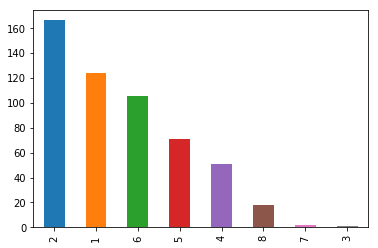

In [32]:
import matplotlib.pyplot as plt

plt.style.use= 'default'

df[0].value_counts().plot(kind="bar")


**Source Distribution**

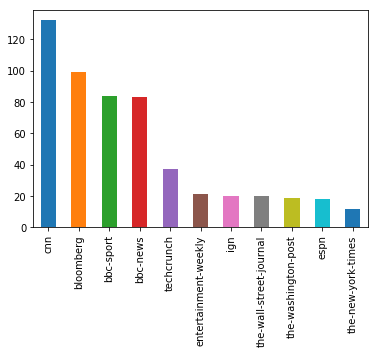

In [6]:
df[3].value_counts().plot(kind="bar")

In [11]:
from IPython.core.display import display, HTML

json_data = df.to_json(orient='records')
HTML_TEMPLATE = """<link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/master/facets-dist/facets-jupyter.html">
        <facets-dive id="elem" height="600"></facets-dive>
        <script>
          var data = {jsonstr};
          document.querySelector("#elem").data = data;
        </script>"""
html = HTML_TEMPLATE.format(jsonstr=json_data)
display(HTML(html))

## Vocabulary Preprocessing
For text, we usually need tokenization and stemming.
### Tokenization
The process of converting a sequence of characters (such as in a computer program or web page) into a sequence of tokens

```
"I like apple, but I hate apple juice."  =>  ["I", "like", "apple", ",", "but", "I", "hate", "apple", "juice", "."]
```

In [13]:
from nltk.tokenize import word_tokenize

sentence = "I like apple, but I hate apple juice."

print(word_tokenize(sentence))

['I', 'like', 'apple', ',', 'but', 'I', 'hate', 'apple', 'juice', '.']


### Stopwords
Stop Words are words which do not contain important significance. Usually these words are filtered out because they return vast amount of unnecessary information.
```
a
about
above
after
again
against
all
am
an
and
any
...
```

In [17]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
print(stop_words)

{"mightn't", "needn't", 'y', 'how', 'as', 'in', 'hasn', 'too', "wasn't", 'her', 'themselves', 'mustn', 'they', 'has', 'very', 'because', 'was', 'those', 'were', 'ain', 'have', 'weren', 'i', 'a', 'needn', 'again', 'isn', 'between', 'but', 'under', 'our', 'herself', 'does', 'haven', "shan't", "that'll", 'against', 'up', 're', 'at', "doesn't", 'had', 'over', 'will', 'from', 'no', 'if', 'yourselves', 'should', 'won', 'it', 'all', 'd', 'be', 'just', 'been', 'more', "don't", 'ourselves', 'why', 'so', 'we', 'll', 'you', 'or', 'itself', 'the', 'out', 'own', "you're", 'yours', "it's", 'not', "weren't", 'about', 'then', 'other', 'having', 'this', 'did', 'of', 'hers', 'any', 'shouldn', 'doing', "haven't", 'couldn', "hasn't", 'himself', 'theirs', 'which', 'are', 'myself', 'aren', 'being', 'during', 'there', 'shan', 'your', 'same', "didn't", 'm', "hadn't", 'wouldn', 'nor', 'on', 'some', 'my', 'o', 'each', 'only', 'through', "should've", 'ours', 'is', 'further', 'don', 'until', 'into', 'off', 'what'

### Stemming
We want to use the stem of words.
```
"fishing", "fished", "fisher", "fishes" => "fish"
```

The three major stemming algorithms in use today are Porter, Snowball(Porter2), and Lancaster (Paice-Husk). Proter and Porter2 are most commonly used stemmers

In [19]:
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import PorterStemmer as SnowballStemmer


lancaster_stemmer = LancasterStemmer()
porter_stemmer = PorterStemmer()
snowball_stemmer = SnowballStemmer()

words = ["fishing", "fished", "fisher", "fishes"]

print([lancaster_stemmer.stem(w.lower()) for w in words])
print([porter_stemmer.stem(w.lower()) for w in words])
print([snowball_stemmer.stem(w.lower()) for w in words])

['fish', 'fish', 'fish', 'fish']
['fish', 'fish', 'fisher', 'fish']
['fish', 'fish', 'fisher', 'fish']


## Vocabulary Embedding
Tensorflow cannot handle String directly. Therefore, we need to convert String into vectors. This is called embedding.

One example:
```
    Sentence 1: "I like apple"
    Sentence 2: "I like banana"
    Sentence 3: "I eat apple"
```

We scan all 3 sentences then we found there are 5 unique words: 
```
    ['I', 'like', 'eat', 'apple', 'banana']
```
Now we can use number to represent each of them:
```
    [0, 1, 2, 3, 4]
```
So, the three sentences can be encoded into:
```
    Sentence 1: [0, 1, 3]
    Sentence 2: [0, 1, 4]
    Sentence 3: [0, 2, 3]
```

### VocabularyProcessor
Tensorflow provides a easy-to-use tool to do embedding.


In [21]:
import numpy as np
import tensorflow as tf

MAX_DOCUMENT_LENGTH = 5

vocab_processor = tf.contrib.learn.preprocessing.VocabularyProcessor(MAX_DOCUMENT_LENGTH)

# fit and transform
sentences = [
    "I like apple",
    "I like banana",
    "I eat apple"
]

embedded_sentences = np.array(list(vocab_processor.fit_transform(sentences)))
print(embedded_sentences)

print('Total unique words: %d' % len(vocab_processor.vocabulary_))

print("")
# just fit: unseen words will be interpreted as 0
new_sentences = [
    "This is a brand new sentence which we never seen before and is very long",
    "I hate doing homework!",
    "I like banana",
    "I eat apple"
]

new_embedded_sentences = np.array(list(vocab_processor.transform(new_sentences)))
print(new_embedded_sentences)


[[1 2 3 0 0]
 [1 2 4 0 0]
 [1 5 3 0 0]]
Total unique words: 6

[[0 0 0 0 0]
 [1 0 0 0 0]
 [1 2 4 0 0]
 [1 5 3 0 0]]


### One-hot Embedding
We have converted the string into an integer vector. But that is not good enough. We need to convert a word into one-hot vector:
```
Assume we only have 10 unique words.

    0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
    2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
    3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
    4 -> [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
    5 -> [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
    6 -> [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
    7 -> [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
    8 -> [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
    9 -> [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
```

Thus, one setence is converted into a matrix:

```
Assume there are only 5 unique words:

    "I like apple" 
-> 
    [1 2 3 0 0] 
->
    [
        [0, 1, 0, 0, 0],  => I
        [0, 0, 1, 0, 0],  => like
        [0, 0, 0, 1, 0],  => apple
        [1, 0, 0, 0, 0],  => padding
        [1, 0, 0, 0, 0]   => padding
    ]
```

#### Tensorflow embed_sequence
Tensorflow provides tf.contrib.layers.embed_sequence which can help use with one-hot embedding. 

In real world, we don't use native [0, 1] way to label a word, but use a real number.

In [23]:
import tensorflow as tf

vocab_size = 6
embed_dim =  3

sentences = [
    [1, 2, 3, 0, 0]
]
embedded_setences = tf.contrib.layers.embed_sequence(sentences, vocab_size, embed_dim)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    result = sess.run(embedded_setences)
    print(result)


[[[ 0.44126928 -0.81430715  0.7869117 ]
  [ 0.75813377  0.20163918 -0.64008635]
  [ 0.21920216 -0.458087   -0.48028946]
  [-0.18101221 -0.57952183  0.4029317 ]
  [-0.18101221 -0.57952183  0.4029317 ]]]


## Convolutional Neural Networks (CNNs)
We cannot dive deep into what is convolution here. 

But here is a great article about CNNs for NLP:
http://www.wildml.com/2015/11/understanding-convolutional-neural-networks-for-nlp/

### Convolution
![image](http://deeplearning.stanford.edu/wiki/images/6/6c/Convolution_schematic.gif)

### Pooling
![image](http://d3kbpzbmcynnmx.cloudfront.net/wp-content/uploads/2015/11/Screen-Shot-2015-11-05-at-2.18.38-PM.png)

## Put Eveyrthing Together

In [25]:
# -*- coding: utf-8 -*-

import numpy as np
import os
import pandas as pd
import pickle
import shutil
import tensorflow as tf

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn import metrics

learn = tf.contrib.learn

DATA_SET_FILE = './labeled_news.csv'

MAX_DOCUMENT_LENGTH = 500
N_CLASSES = 8


EMBEDDING_SIZE = 100
N_FILTERS = 10
WINDOW_SIZE = 10
FILTER_SHAPE1 = [WINDOW_SIZE, EMBEDDING_SIZE]
FILTER_SHAPE2 = [WINDOW_SIZE, N_FILTERS]
POOLING_WINDOW = 4
POOLING_STRIDE = 2

LEARNING_RATE = 0.01
STEPS = 50 # Set a small number for demonstration purpose.

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def generate_cnn_model(n_classes, n_words):
    """2 layer CNN to predict from sequence of words to a class."""
    def cnn_model(features, target):
        # Convert indexes of words into embeddings.
        # This creates embeddings matrix of [n_words, EMBEDDING_SIZE] and then
        # maps word indexes of the sequence into [batch_size, sequence_length,
        # EMBEDDING_SIZE].

        target = tf.one_hot(target, n_classes, 1, 0)
        word_vectors = tf.contrib.layers.embed_sequence(
            features, vocab_size=n_words, embed_dim=EMBEDDING_SIZE, scope='words')

        word_vectors = tf.expand_dims(word_vectors, 3)
        
        with tf.variable_scope('CNN_layer1'):
            # Apply Convolution filtering on input sequence.
            conv1 = tf.contrib.layers.convolution2d(
                word_vectors, N_FILTERS, FILTER_SHAPE1, padding='VALID')
            # Add a RELU for non linearity.
            conv1 = tf.nn.relu(conv1)
            # Max pooling across output of Convolution+Relu.
            pool1 = tf.nn.max_pool(
                conv1,
                ksize=[1, POOLING_WINDOW, 1, 1],
                strides=[1, POOLING_STRIDE, 1, 1],
                padding='SAME')
            # Transpose matrix so that n_filters from convolution becomes width.
            pool1 = tf.transpose(pool1, [0, 1, 3, 2])
      
        with tf.variable_scope('CNN_layer2'):
            # Second level of convolution filtering.
            conv2 = tf.contrib.layers.convolution2d(
                pool1, N_FILTERS, FILTER_SHAPE2, padding='VALID')
            # Max across each filter to get useful features for classification.
            pool2 = tf.squeeze(tf.reduce_max(conv2, 1), squeeze_dims=[1])

        # Apply regular WX + B and classification.
        logits = tf.contrib.layers.fully_connected(pool2, n_classes, activation_fn=None)
        loss = tf.contrib.losses.softmax_cross_entropy(logits, target)

        train_op = tf.contrib.layers.optimize_loss(
          loss,
          tf.contrib.framework.get_global_step(),
          optimizer='Adam',
          learning_rate=LEARNING_RATE)

        return ({
          'class': tf.argmax(logits, 1),
          'prob': tf.nn.softmax(logits)
        }, loss, train_op)

    return cnn_model


def main(unused_argv):
    # Prepare training and testing data
    df = pd.read_csv(DATA_SET_FILE, header=None)

    # Random shuffle
    df.sample(frac=0.2)

    train_df = df[0:80]
    test_df = df.drop(train_df.index)

    # x - news description, y - class
    x_train = train_df[2]
    y_train = train_df[0]
    x_test = test_df[2]
    y_test = test_df[0]

    # tokenize sentences
    x_train = [word_tokenize(sentence) for sentence in x_train.tolist()]
    x_test = [word_tokenize(sentence) for sentence in x_test.tolist()]

    # Stemming words.
    norm_x_train = []
    norm_x_test = []
    for tokens in x_train:
        stemmed_tokens = [stemmer.stem(w.lower()) for w in tokens if not w in stop_words]
        norm_sentence =  ' '.join(stemmed_tokens)
        norm_x_train.append(norm_sentence)

    for tokens in x_test:
        stemmed_tokens = [stemmer.stem(w.lower()) for w in tokens if not w in stop_words]
        norm_sentence =  ' '.join(stemmed_tokens)
        norm_x_test.append(norm_sentence)

    x_train = norm_x_train
    x_test = norm_x_test

    # Process vocabulary
    vocab_processor = learn.preprocessing.VocabularyProcessor(MAX_DOCUMENT_LENGTH)
    x_train = np.array(list(vocab_processor.fit_transform(x_train)))
    x_test = np.array(list(vocab_processor.transform(x_test)))

    n_words = len(vocab_processor.vocabulary_)
    print('Total words: %d' % n_words)
  
    # Build model
    classifier = learn.Estimator(
        model_fn=generate_cnn_model(N_CLASSES, n_words))

    # Train and predict
    classifier.fit(x_train, y_train, steps=STEPS)

    # Evaluate model
    y_predicted = [
        p['class'] for p in classifier.predict(x_test, as_iterable=True)
    ]
    print(y_predicted)

    score = metrics.accuracy_score(y_test, y_predicted)
    print('Accuracy: {0:f}'.format(score))

if __name__ == '__main__':
    tf.app.run(main=main)



Total words: 859
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f8b00350240>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmpvwlksb9a'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /t

SystemExit: 